In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)


# Loan Case Study

## AIM:
This case study aims to identify patterns which indicate if a client has difficulty paying their installments
which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to
risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying
the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

# 1. Application Data

# 1.1 Data Inspection and Cleaning

In [4]:
application_data = pd.read_csv('F:\Data Analysis Projects\\application_data.csv')

In [5]:
# Checking Number of Rows and Columns 

application_data.shape

(307511, 122)

In [6]:
# Getting information about application_data

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


65 columns have Float64 data type, 
41 columns have int64 data type, 
16 columns have object data type

In [7]:
application_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
# Inspecting the data 

for i in application_data.columns :
    
    print(i)
    
    print(application_data[i].value_counts())
    
    print(' ')

SK_ID_CURR
100002    1
337664    1
337661    1
337660    1
337659    1
         ..
218992    1
218991    1
218990    1
218989    1
456255    1
Name: SK_ID_CURR, Length: 307511, dtype: int64
 
TARGET
0    282686
1     24825
Name: TARGET, dtype: int64
 
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
 
CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
 
FLAG_OWN_CAR
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
 
FLAG_OWN_REALTY
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
 
CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64
 
AMT_INCOME_TOTAL
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0     

In [9]:
# Replacing Unnecessary values like XAP, XNA, Unknown

for i in application_data.columns :
    
    application_data[i] = application_data[i].apply(lambda x : np.NaN if x == 'XAP' else x)
    
    application_data[i] = application_data[i].apply(lambda x : np.NaN if x == 'XNA' else x)
    
    application_data[i] = application_data[i].apply(lambda x : np.NaN if x == 'Unknown' else x)

In [10]:
# Checking Duplicates values

application_data.duplicated().value_counts()

False    307511
dtype: int64

No Duplicate values Found

In [11]:
days_col_list = [i for i in application_data.columns if i.startswith('DAYS')]

for x in days_col_list:
    
    application_data[x] = application_data[x].apply(lambda x : abs(x))

In [12]:
application_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [13]:
 # Checking Missing values 
    
Missing_values = pd.DataFrame((application_data.isnull().sum()/len(application_data.index))*100, columns = ['Percentage of Missing values'])

Missing_values.sort_values(by = 'Percentage of Missing values', ascending = False)

,Percentage of Missing values
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
COMMONAREA_MEDI,69.872297
NONLIVINGAPARTMENTS_AVG,69.432963
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_MEDI,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_MEDI,68.354953
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MODE,68.354953


In [14]:
# Dropping columns with more then 50% missing values

application_data = application_data.drop(columns = Missing_values[Missing_values['Percentage of Missing values'] > 50].index)

In [15]:
# Columns with less then 13% missing values

Missing_values[(Missing_values['Percentage of Missing values'] < 13) & (Missing_values['Percentage of Missing values'] >0) ].index

Index(['CODE_GENDER', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [16]:
# Columns with object data type

application_data.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [17]:
columns_to_convert = ['AMT_GOODS_PRICE', 'EXT_SOURCE_2']

for x in columns_to_convert:
    
    application_data[x] = pd.to_numeric(application_data[x], errors = 'coerce')

# 1.2 Checking outliners from the columns which will be used in analysis

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

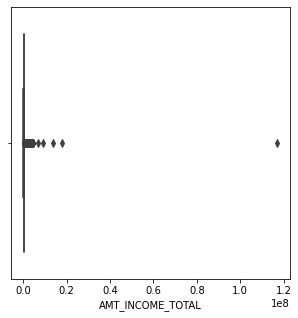

In [18]:
plt.figure(figsize = (5,5))

sns.boxplot(application_data['AMT_INCOME_TOTAL'])

In [19]:
application_data[application_data['AMT_INCOME_TOTAL'] == application_data['AMT_INCOME_TOTAL'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,12615,922,6762.0,3643,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.113161,0.145543,0.9791,0.1667,0.9791,0.1667,0.9791,0.1667,0.0715,No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
# removing outliner from AMT_INCOME_TOTAL column

application_data = application_data.drop(index = 12840)

<AxesSubplot:xlabel='AMT_CREDIT'>

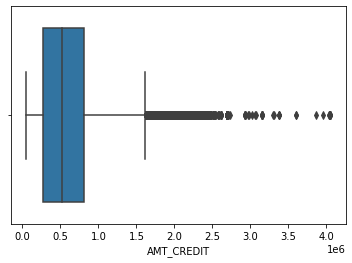

In [21]:
sns.boxplot(application_data['AMT_CREDIT'])

<AxesSubplot:xlabel='AMT_ANNUITY'>

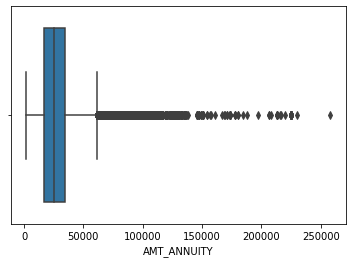

In [22]:
sns.boxplot(application_data['AMT_ANNUITY'])

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

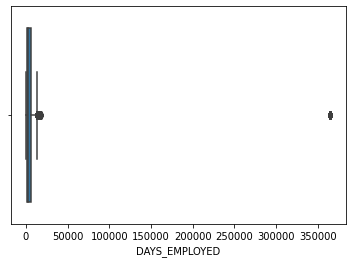

In [23]:
sns.boxplot(application_data['DAYS_EMPLOYED'])

<AxesSubplot:xlabel='DAYS_BIRTH'>

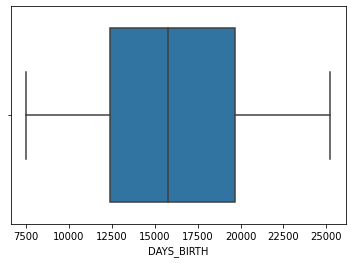

In [24]:
sns.boxplot(application_data['DAYS_BIRTH'])

# 1.3 Imputing Columns that have less then 13 % missing Values

# 1.3.1 Imptuing CODE_GENDER

In [25]:
application_data['CODE_GENDER'].mode()

0    F
Name: CODE_GENDER, dtype: object

In [26]:
# Replacing Missing values in CODE_GENDER column with F

application_data['CODE_GENDER'] = application_data['CODE_GENDER'].replace(np.NaN, 'F')

# 1.3.2 Imptuing AMT_ANNUITY

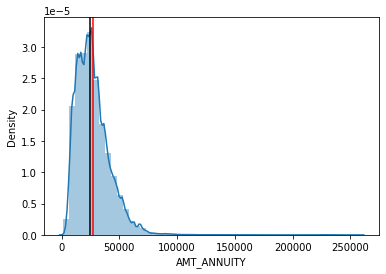

In [27]:
sns.distplot(application_data['AMT_ANNUITY'])

plt.axvline(x = application_data['AMT_ANNUITY'].mean(), color = 'red')

plt.axvline(x = application_data['AMT_ANNUITY'].median(), color = 'black')

<AxesSubplot:xlabel='AMT_ANNUITY'>

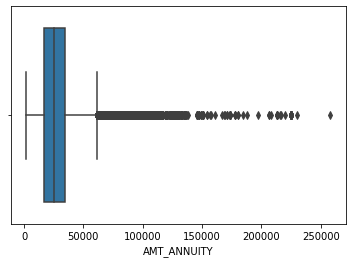

In [28]:
sns.boxplot(application_data['AMT_ANNUITY'])

Data is not normally Distributed as Mean is not equal to median so replace missing values with median

In [29]:
application_data['AMT_GOODS_PRICE'] = application_data['AMT_GOODS_PRICE'].replace(np.NaN, application_data['AMT_GOODS_PRICE'].median)

# 1.3.3 Imptuing NAME_FAMILY_STATUS

In [30]:
application_data['NAME_FAMILY_STATUS'].mode()

0    Married
Name: NAME_FAMILY_STATUS, dtype: object

In [31]:
# Replacing Missing values in NAME_FAMILY_STATUS column with Married

application_data['NAME_FAMILY_STATUS'] = application_data['NAME_FAMILY_STATUS'].replace(np.NaN, 'Married')

# 1.3.4 Imptuing CNT_FAM_MEMBERS

In [32]:
application_data['CNT_FAM_MEMBERS'].mode()

0    2.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [33]:
# Replacing Missing values in CNT_FAM_MEMBERS column with 2

application_data['CNT_FAM_MEMBERS'] = application_data['CNT_FAM_MEMBERS'].replace(np.NaN, 2)

# 1.3.5 Imptuing EXT_SOURCE_2

<AxesSubplot:xlabel='EXT_SOURCE_2'>

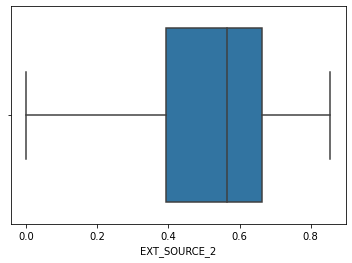

In [34]:
sns.boxplot(application_data['EXT_SOURCE_2'])

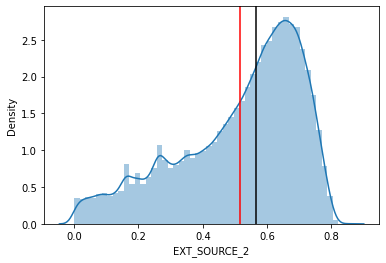

In [35]:
sns.distplot(application_data['EXT_SOURCE_2'])

plt.axvline(x = application_data['EXT_SOURCE_2'].mean(), color = 'red')

plt.axvline(x = application_data['EXT_SOURCE_2'].median(), color = 'black')

Data is not normally Distributed as Mean is not equal to median so replace missing values with median

In [36]:
application_data['EXT_SOURCE_2'] = application_data['EXT_SOURCE_2'].replace(np.NaN, application_data['EXT_SOURCE_2'].median)

In [37]:
# Dropping unnecessary columns 

application_data = application_data.dropna(subset = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                                                                                    'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                                                                                    'DAYS_LAST_PHONE_CHANGE' ])

# 1.4 Adding new columns to the data

In [38]:
# Inserting Credit ratio column

application_data['Credit ratio value'] = application_data['AMT_ANNUITY']/ application_data['AMT_INCOME_TOTAL']

In [39]:
application_data['Credit ratio'] = pd.qcut(application_data['Credit ratio value'], q = [0,0.2,0.4,0.6,0.8,1], labels = ['Very low', 'Low', 'Medium', 'High', 'Very High'])

In [40]:
# Inserting age column

application_data['Age'] = application_data['DAYS_BIRTH'] / 365.25

In [41]:
application_data['Age'] = round(application_data['Age'], 0)

application_data['Age'].value_counts()

39.0    8953
38.0    8802
37.0    8696
40.0    8623
28.0    8429
41.0    8416
42.0    8329
32.0    8298
43.0    8220
36.0    8188
44.0    8118
31.0    7984
30.0    7811
34.0    7689
33.0    7688
35.0    7676
29.0    7617
54.0    7458
46.0    7330
45.0    7330
53.0    7161
47.0    7153
55.0    7067
48.0    6894
57.0    6881
49.0    6745
52.0    6697
50.0    6689
56.0    6681
60.0    6563
59.0    6472
27.0    6443
51.0    6414
58.0    6346
61.0    5761
63.0    5432
62.0    5338
64.0    5003
26.0    4368
65.0    4214
25.0    4062
24.0    3817
23.0    3674
66.0    2597
22.0    1993
67.0    1850
68.0    1598
21.0     652
69.0     268
Name: Age, dtype: int64

Maximum age = 69, Minimum age = 21

In [42]:
# Inserting Age category Column

application_data['Age category'] = pd.cut(application_data.Age, [19,25,65,69], labels = ['Youth', 'Adult', 'Senior Citizen'] )

In [43]:
# Inserting Years employed Column

application_data['YEARS_EMPLOYED'] = application_data['DAYS_EMPLOYED']/365.25 

application_data['YEARS_EMPLOYED'] = round(application_data['YEARS_EMPLOYED'], 0)

In [44]:
application_data['YEARS_EMPLOYED'].value_counts()

1000.0    55202
1.0       34678
2.0       30497
3.0       27610
4.0       22859
5.0       19125
6.0       15338
7.0       14046
8.0       12349
9.0        9919
0.0        9711
10.0       8289
11.0       6450
12.0       5585
13.0       4739
14.0       4480
15.0       3877
16.0       2346
17.0       2210
18.0       1915
19.0       1839
20.0       1797
21.0       1503
22.0       1395
23.0       1104
24.0        940
25.0        863
26.0        723
28.0        650
27.0        634
29.0        580
30.0        501
31.0        440
32.0        384
34.0        356
33.0        351
35.0        296
36.0        203
37.0        175
38.0        129
39.0        122
40.0         79
41.0         67
42.0         42
43.0         31
45.0         27
44.0         18
46.0          7
48.0          4
47.0          2
49.0          1
Name: YEARS_EMPLOYED, dtype: int64

Years employed can't be 1000 so replacing this with Nan Value

In [45]:
(application_data[application_data['YEARS_EMPLOYED'] == 1000]) = np.NaN

In [46]:
# Modifying REGION_POPULATION_RELATIVE column

application_data['REGION_POPULATION_RELATIVE'] = pd.qcut(application_data['REGION_POPULATION_RELATIVE'],
                                    q = [0,0.2,0.4,0.6,0.8,1], labels = ['Very low', 'Low', 'Medium', 'High', 'Very High'])

In [47]:
# Creating two datasets df1 - for clients with payment difficulties, df0 - all other cases

df1 = application_data[application_data['TARGET'] == 1]

df0 = application_data[application_data['TARGET'] == 0]

# 1.5 Analysis

([<matplotlib.patches.Wedge at 0x26b9521cfd0>,
 [Text(-1.0593793567947913, 0.29616782133961517, 'No payment Difficulties'),
  Text(1.1556865710488633, -0.32309216873412583, 'Payment Difficulties')],
 [Text(-0.5778432855244316, 0.1615460843670628, '91.3%'),
  Text(0.6741504997785036, -0.18847043176157338, '8.7%')])

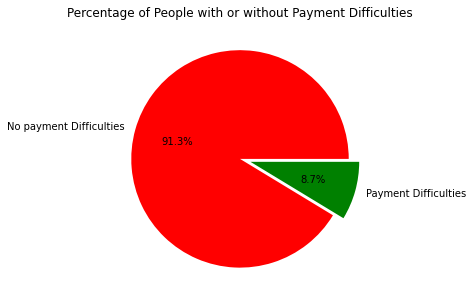

In [48]:
# Creating data frame for pie chart

pie = pd.DataFrame(application_data['TARGET'].value_counts())

# Changing fig size

plt.figure(figsize = (5,5))

# Creating pie chart

plt.title('Percentage of People with or without Payment Difficulties')

plt.pie([pie.iloc[0][0], pie.iloc[1][0]], labels = ['No payment Difficulties', 'Payment Difficulties'], colors = ['red', 'green'], explode =(0,0.1),
           
           autopct = '%1.1f%%')

# 1.5.1 Univariate analysis

In [49]:
def bargraphs(col):
    
    df1_graphs = pd.DataFrame((df1[col].value_counts()/df1[col].count() *100))
    
    plt.bar(df1_graphs.index, df1_graphs[col], color = 'red')
    
    plt.xticks(rotation = 90)
    
    plt.title('Defaulters')
    
    plt.xlabel(col)
    
    plt.ylabel('Percentage (%)')
    
    plt.xticks(rotation = 90)
    
    plt.show()
    
    
    df0_graphs = pd.DataFrame((df0[col].value_counts()/df0[col].count() *100))
    
    plt.bar(df0_graphs.index, df0_graphs[col], color = 'green')
    
    plt.xticks(rotation = 90)
    
    plt.title('Non Defaulters')
    
    plt.xlabel(col)
    
    plt.ylabel('Percentage (%)')
    
    plt.xticks(rotation = 90)

    plt.show()

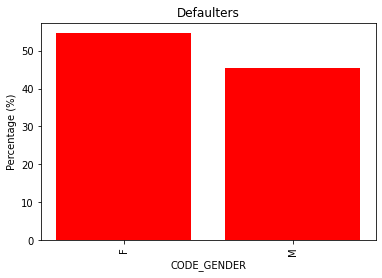

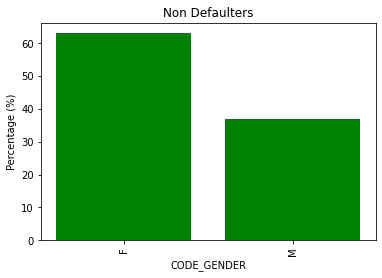

In [50]:
bargraphs('CODE_GENDER')

**From the graphs above we can conclude that:**

**There are more number of Females that apply for loan so there are more chances of default from the females but the Rate of Male default is more then Female default**

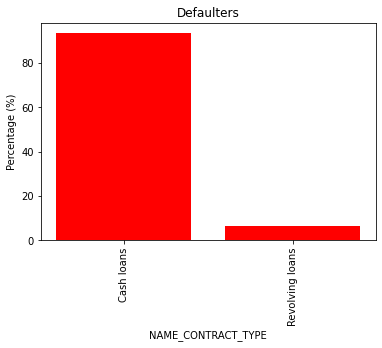

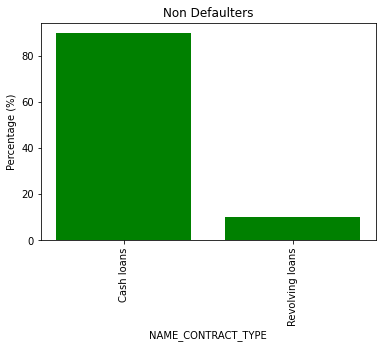

In [51]:
bargraphs('NAME_CONTRACT_TYPE')

**From the graphs above we can conclude that:**

**There are more number of people that apply for cash loan so there are more chances of default of cash loans also the Rate of cash loan  default is more then revolving loan default**

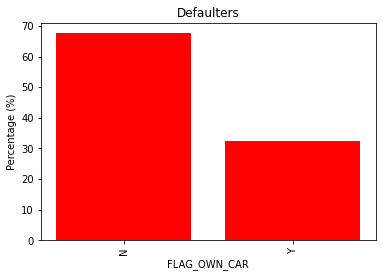

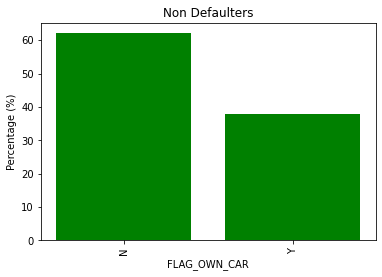

In [52]:
bargraphs('FLAG_OWN_CAR')

**We can see that people without cars contribute more to the defaulters, the reason could be there are simply more people without cars
Looking at the percentages in both the charts, we can conclude that the rate of default of people having car is low compared to people who don't.**

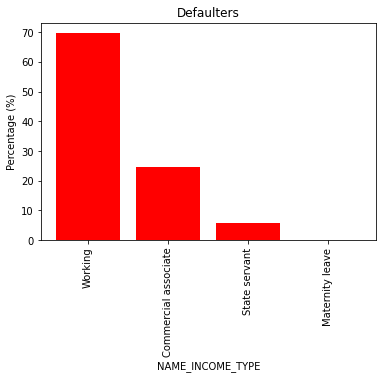

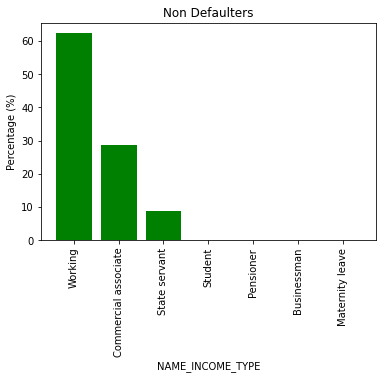

In [53]:
bargraphs('NAME_INCOME_TYPE')

**We can notice that the students don't default. The reason could be they are not required to pay during the time they are students.
We can also see that the BusinessMen never default.
Most of the loans are distributed to working class people
We also see that working class people contribute 62% to non defaulters while they contribute to 69% of the defaulters. Clearly, the chances of defaulting are more in their case.**

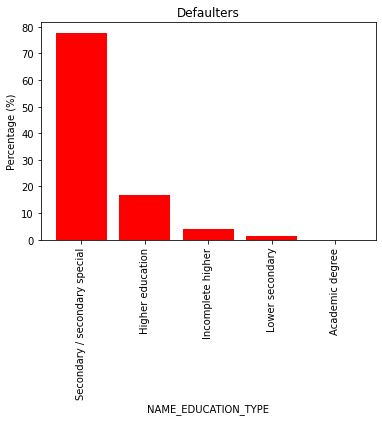

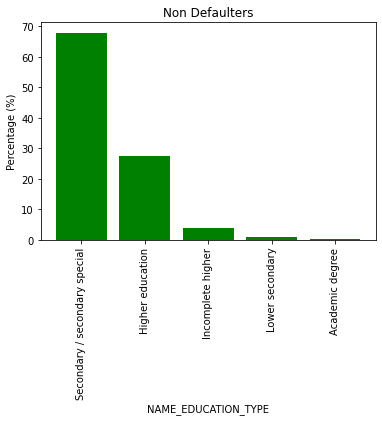

In [54]:
bargraphs('NAME_EDUCATION_TYPE')

**Almost all of the Education categories are equally likely to default except for the higher educated ones who are less likely to default and secondary educated people are more likely to default**

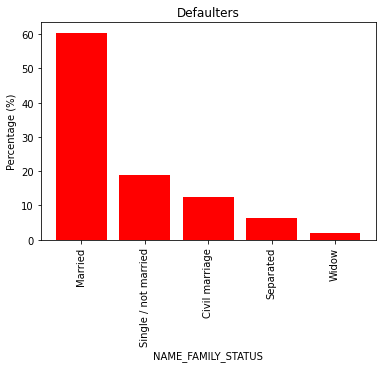

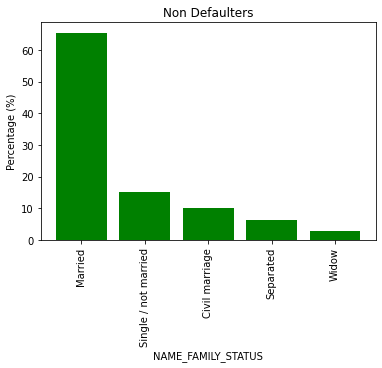

In [55]:
bargraphs('NAME_FAMILY_STATUS')

**Married people tend to apply for more loans comparatively. 
But from the graph we see that Single/non Married people contribute more to the defaulters. So there is more risk associated with them.**

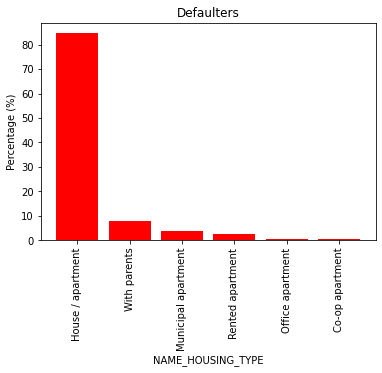

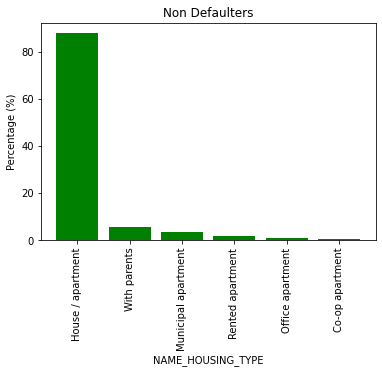

In [56]:
bargraphs('NAME_HOUSING_TYPE')

**It is clear from the graph that people who have House/Appartment, tend to apply for more loans.
People living in rental appartment or with parents tend to default more often when compared with others.The reason could be their living expenses are more due to their parents living with them.**

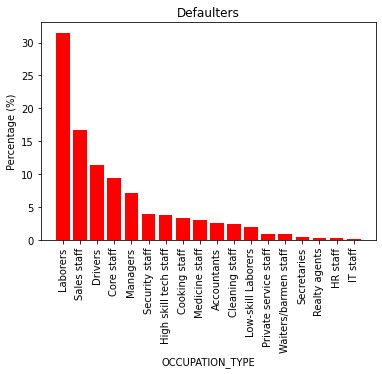

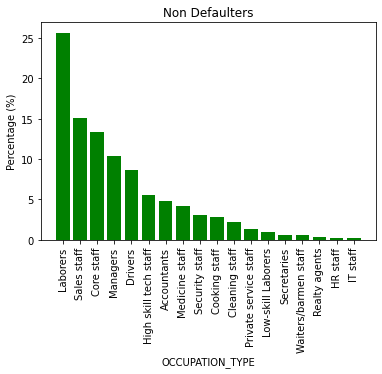

In [57]:
bargraphs('OCCUPATION_TYPE')

**It is clear from the graph that people who have occupation type as Laborers, tend to apply for more loans.
People who have occupation type as Laborers,Cooking staff,Drivers,Low-skill Laborers,Waiters/barmen staff  tend to default more often when compared with others**

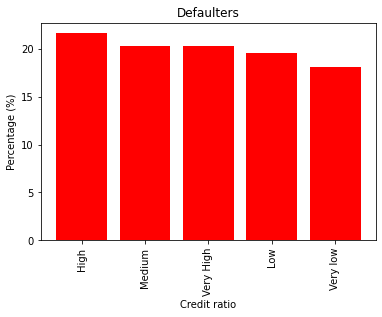

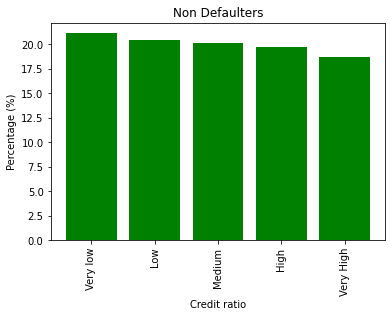

In [58]:
bargraphs('Credit ratio')

**People who have high and very high credit ratio tend to default more often when compared to others**

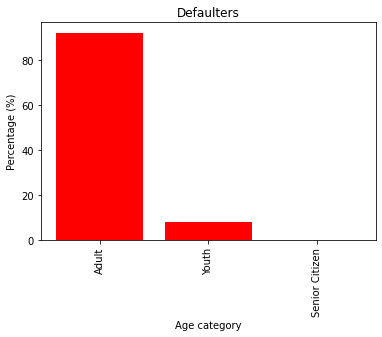

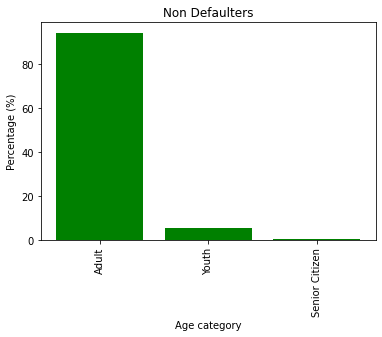

In [59]:
bargraphs('Age category')

**Youth tend to default more when compared with Adult and Senior citizens the reason could be lack of Income sources for them**

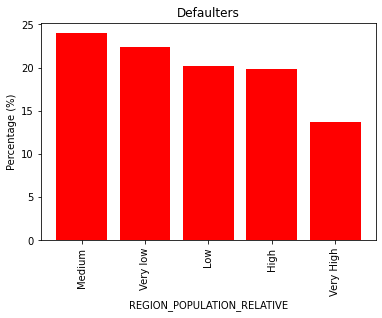

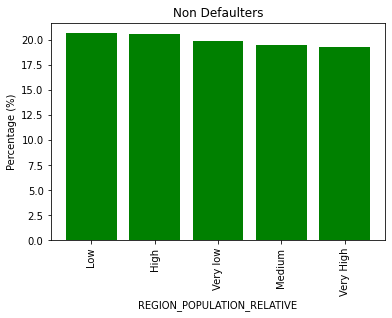

In [60]:
bargraphs('REGION_POPULATION_RELATIVE')

**Defaulter are tend to be more if the Region Population relative is very Low and Medium**

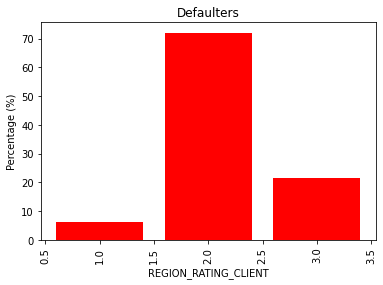

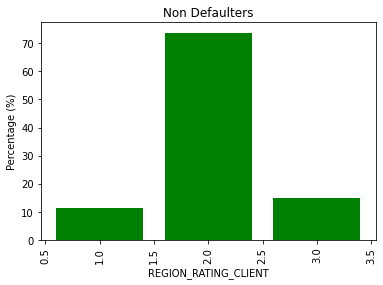

In [61]:
bargraphs('REGION_RATING_CLIENT')

**More people from second tier regions tend to apply for loans.
We can infer that people living in better areas(Rating 3) tend contribute more to the defaulters by their weightage**

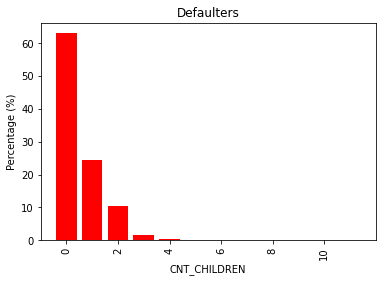

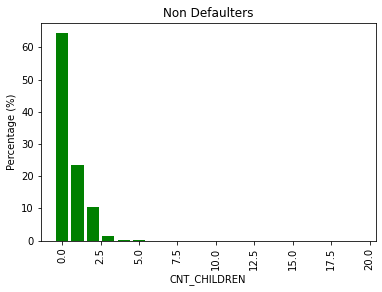

In [62]:
bargraphs('CNT_CHILDREN')

**From this graph we can conclude that mostly people with Zero Children took loan and people having 3 or more then 3 children tends to default more when compared with others**

# 1.5.2 Correlation of Selected columns

In [63]:
cols = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_BIRTH','DAYS_EMPLOYED',
        'CNT_FAM_MEMBERS','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','OBS_30_CNT_SOCIAL_CIRCLE',
        'OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','YEARS_EMPLOYED','Age',
        'Credit ratio value']

<AxesSubplot:>

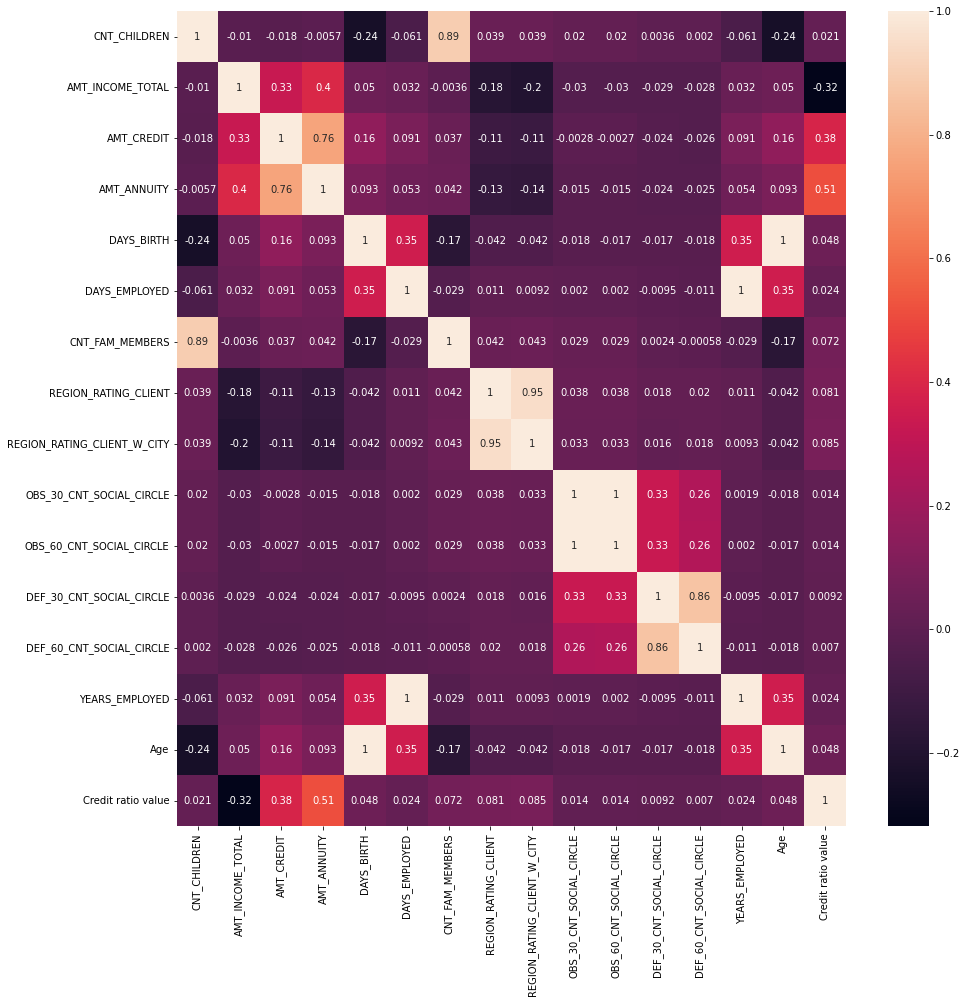

In [64]:
# heatmap for selected data

corr = application_data[cols].corr()

plt.figure(figsize = (15,15))

sns.heatmap(corr, annot = True)

# 1.5.3 Bivariate analysis for continuous data

In [65]:
selected_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE', 'Credit ratio value']

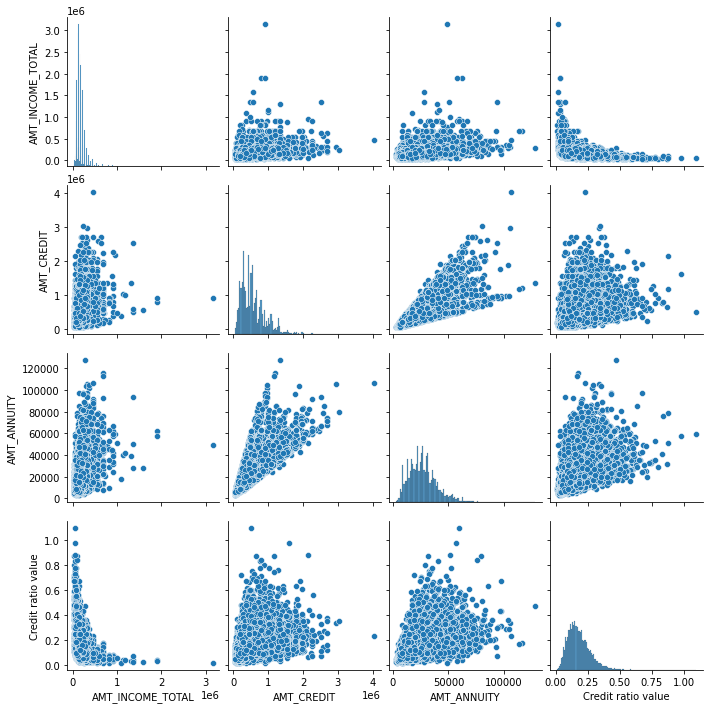

In [66]:
sns.pairplot(df1[selected_cols])

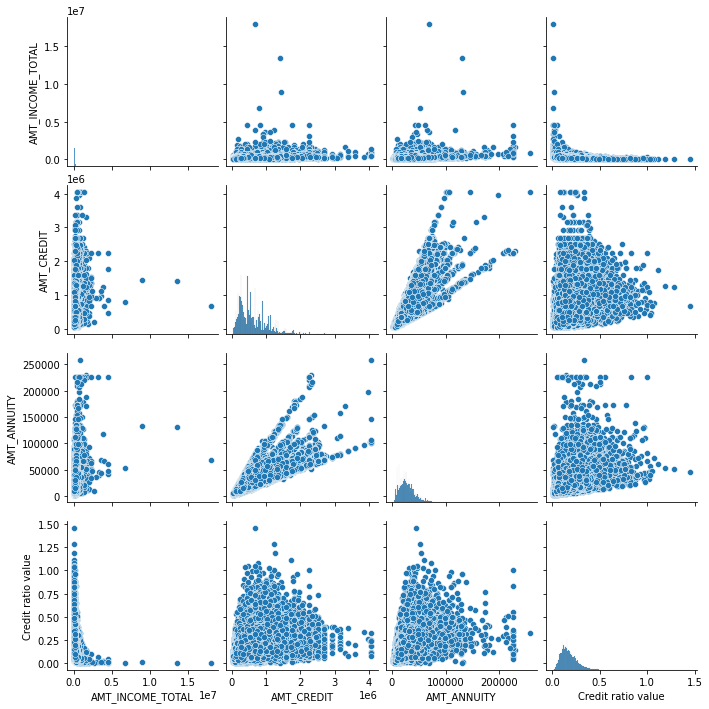

In [67]:
sns.pairplot(df0[selected_cols])

**From the above two pair plots we can infer that**

**1. With increase in the credit amount, Amount annuity and Credit ratio value increases**

**2. With increase in Credit ratio value Income of the applicant decreases and Amount annuity increases**

# 2. Previous Application Data

# 2.1 Data Inspection and Cleaning

In [68]:
prev_app = pd.read_csv('F:\Data Analysis Projects\\previous_application.csv')

In [69]:
# Shape of Data frame

prev_app.shape

(1670214, 37)

In [70]:
# Getting info about data frame

prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [71]:
# Inspecting the data 

for i in prev_app.columns :
    
    print(i)
    
    print (prev_app[i].value_counts())
    
    print(' ')

SK_ID_PREV
2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64
 
SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: SK_ID_CURR, Length: 338857, dtype: int64
 
NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
 
AMT_ANNUITY
2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
3794.445         1
8723.160         1
27948.330        1
25374.285        1
14704.290        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64
 
AMT_APPLICATION
0.00         392402
45000.00      47831
225000.00     43543
135000.00     40678
450000.00     38905
              ...  
185292.00         1
22

After inspection it is found that there are some values like XAP, XNA which should be replaced with NaN

Also some negative values must be changed to absolute values

In [72]:
# Replacing Unnecessary values like XAP, XNA

for i in prev_app.columns:
    
    prev_app[i] = prev_app[i].apply(lambda x : np.NaN if x == 'XAP' else x)
    
    prev_app[i] = prev_app[i].apply(lambda x : np.NaN if x == 'XNA' else x)

In [73]:
# Changing negative values to positive values

Days_col_list =[i for i in prev_app.columns if i.startswith('DAY')]

prev_app[Days_col_list] = prev_app[Days_col_list].apply(lambda x : abs(x))

prev_app['SELLERPLACE_AREA'] = prev_app['SELLERPLACE_AREA'].apply(lambda x : abs(x))

In [74]:
# Checking duplicates

prev_app.duplicated().value_counts()

False    1670214
dtype: int64

No duplicates Present

In [75]:
# Checking Missing values

Missing_Values = pd.DataFrame(((prev_app.isnull().sum()/ len(prev_app))*100), columns = ['Percentage of Missing values'])

Missing_Values.sort_values(by = 'Percentage of Missing values', ascending = False)

,Percentage of Missing values
RATE_INTEREST_PRIMARY,99.643698
RATE_INTEREST_PRIVILEGED,99.643698
NAME_CASH_LOAN_PURPOSE,95.830774
CODE_REJECT_REASON,81.327123
NAME_PRODUCT_TYPE,63.684414
NAME_GOODS_CATEGORY,56.927376
AMT_DOWN_PAYMENT,53.636480
RATE_DOWN_PAYMENT,53.636480
NAME_SELLER_INDUSTRY,51.234153
NAME_TYPE_SUITE,49.119754


In [76]:
#  Dropping columns with more then 80% missing values

prev_app = prev_app.drop(columns = Missing_Values[Missing_Values['Percentage of Missing values'] > 80].index)

In [77]:
# Columns with more then 0% and less then 22% missing values

Missing_Values[(Missing_Values['Percentage of Missing values'] > 0) & (Missing_Values['Percentage of Missing values'] < 22)]

,Percentage of Missing values
NAME_CONTRACT_TYPE,0.020716
AMT_CREDIT,0.000060
NAME_CLIENT_TYPE,0.116213
PRODUCT_COMBINATION,0.020716


# 2.2 Imputing columns that have more then 0% and less then 22% missing values

# 2.2.1 Imputing NAME_CONTRACT_TYPE column

In [78]:
# It is categorial data so replacing missing values with the mode

prev_app['NAME_CONTRACT_TYPE'].mode()

0    Cash loans
Name: NAME_CONTRACT_TYPE, dtype: object

In [79]:
prev_app['NAME_CONTRACT_TYPE'] = prev_app['NAME_CONTRACT_TYPE'].replace(np.NaN, 'Cash loans')

# 2.2.2 Imputing NAME_CLIENT_TYPE column

In [80]:
# It is categorial data so replacing missing values with the mode

prev_app['NAME_CLIENT_TYPE'].mode()

0    Repeater
Name: NAME_CLIENT_TYPE, dtype: object

In [81]:
prev_app['NAME_CLIENT_TYPE'] = prev_app['NAME_CLIENT_TYPE'].replace(np.NaN, 'Repeater')

# 2.2.3 Imputing AMT_CREDIT column

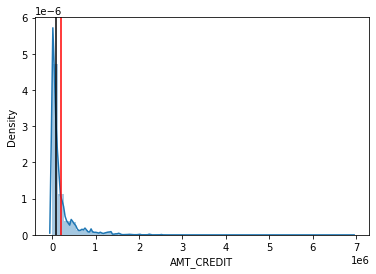

In [82]:
sns.distplot(prev_app['AMT_CREDIT'])

plt.axvline(x = prev_app['AMT_CREDIT'].mean(), color = 'red')

plt.axvline(x = prev_app['AMT_CREDIT'].median(), color = 'black')

Data is not normally distributed so replacing the missing values with median

In [83]:
prev_app['AMT_CREDIT'] = prev_app['AMT_CREDIT'].replace(np.NaN, prev_app['AMT_CREDIT'].median())

# 2.2.4 Imputing PRODUCT_COMBINATION column

In [84]:
# It is categorial data so replacing missing values with the mode

prev_app['PRODUCT_COMBINATION'].mode()

0    Cash
Name: PRODUCT_COMBINATION, dtype: object

In [85]:
prev_app['PRODUCT_COMBINATION'] = prev_app['PRODUCT_COMBINATION'].replace(np.NaN, 'Cash')

# 2.3 Adding new column to data 

In [86]:
prev_app['AMT_CREDIT_CATEGORY'] = pd.qcut(prev_app['AMT_CREDIT'], q = [0,0.2,0.4,0.6,0.8,1],
                                           
                                                                  labels = ['Very low', 'Low', 'Medium', 'High'], duplicates='drop')

# 2.4 Analysis

# 2.4.1 Univariate Analysis

In [87]:
def countplot(var1, var2):
    
    sns.countplot(prev_app[var1], hue = prev_app[var2])

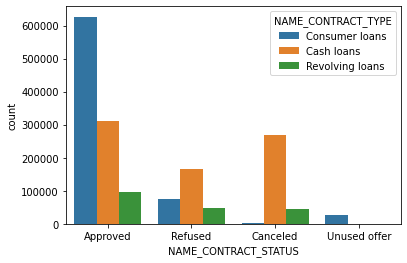

In [88]:
countplot('NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE')

**From the above chart, we can infer that, most of the applications are for 'Cash loan' and 'Consumer loan'. Although the cash loans are refused & canceled more often than others.**

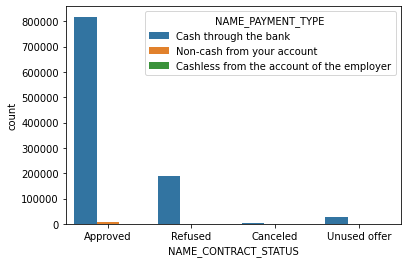

In [89]:
countplot('NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE')

**From the above chart, we can infer that most of the clients chose to repay the loan using the 'Cash through the bank' option <br> We can also see that 'Non-Cash from your account' & 'Cashless from the account of the employee' options are not at all popular in terms of loan repayment amongst the customers.**

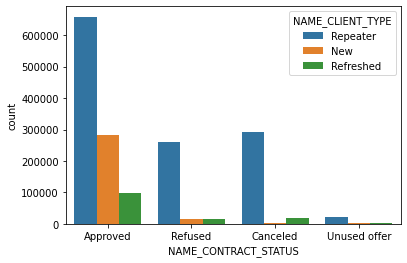

In [90]:
countplot('NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE')

**Most of the loan applications are from repeat customers, they also get refused most often.**

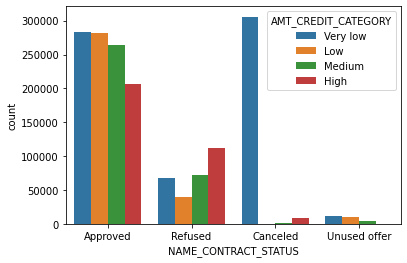

In [91]:
countplot('NAME_CONTRACT_STATUS', 'AMT_CREDIT_CATEGORY')

**We can infer that when the AMT_CREDIT is too low, it get's cancelled/unused most of the time.**

# 2.4.2 Correlation of selected columns

<AxesSubplot:>

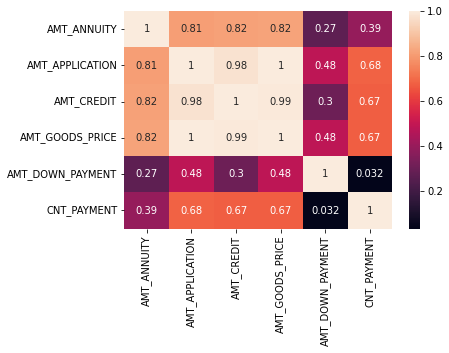

In [92]:
prev_cols = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_DOWN_PAYMENT', 'CNT_PAYMENT']

Corr = prev_app[prev_cols].corr()

sns.heatmap(Corr, annot = True)

# 2.4.3 Bivariate analysis for continuous data

In [93]:
sns.pairplot(prev_app[prev_cols])

**1. Annuity of previous application has a very high and positive influence over: (Increase of annuity increases below factors)**

**(a) How much credit did client asked on the previous application**

**(b)Final credit amount on the previous application that was approved by the bank**

**(c) Goods price of good that client asked for on the previous application**

**2. For how much credit did client ask on the previous application is highly influenced by the Goods price of good that client has asked for on the previous application**

**3. Final credit amount disbursed to the customer previously, after approval is highly influence by the application amount and also the goods price of good that client asked for on the previous application.**

# 2.5 Combined data Analysis

In [ ]:
combined_data = pd.merge(prev_app, application_data, how = 'left', on ='SK_ID_CURR')

In [ ]:
combined_data.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_CREDIT_CATEGORY,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Credit ratio value,Credit ratio,Age,Age category,YEARS_EMPLOYED
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,Approved,73,Cash through the bank,NaN,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0,Very low,0.0,Cash loans,F,N,Y,1.0,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,Very High,14443.0,7392.0,8447.0,4120.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,3.0,1.0,1.0,TUESDAY,17.0,0.0,1.0,1.0,0.0,0.0,0.0,Military,0.683797,NaN,0.9821,0.3333,0.9821,0.3333,0.9821,0.3333,0.0403,No,3.0,0.0,3.0,0.0,548.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114680,Low,40.0,Adult,20.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,Approved,164,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Contact center,1,NaN,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0,High,0.0,Revolving loans,F,N,N,0.0,90000.0,135000.0,6750.0,135000.0,Family,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,High,21335.0,1255.0,5455.0,4263.0,1.0,1.0,0.0,1.0,0.0,0.0,Private service staff,2.0,2.0,2.0,SUNDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Self-employed,0.663524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,517.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.075000,Very low,58.0,Adult,3.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,Approved,301,Cash through the bank,"Spouse, partner",Repeater,NaN,Cash,x-sell,Credit and cash offices,1,NaN,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0,Medium,0.0,Cash loans,F,N,Y,3.0,40500.0,284400.0

In [ ]:
def combined_data_plots(var1, var2):
    
    Newdata = combined_data.pivot_table(values='SK_ID_PREV', index= var1, columns = var2, aggfunc='count')

    ((Newdata/Newdata.sum(axis = 0))*100).plot(kind = 'bar')    

In [ ]:
combined_data_plots('CODE_GENDER', 'NAME_CONTRACT_STATUS')

**We see that code gender doesn't have any effect on application approval or rejection.**
**But we saw earlier that female have lesser chances of default compared to males. The bank can add more weightage to female while approving a loan amount.**

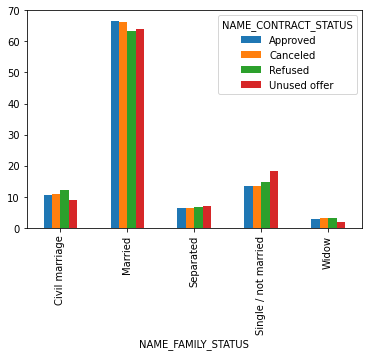

In [ ]:
combined_data_plots('NAME_FAMILY_STATUS', 'NAME_CONTRACT_STATUS')

**From this graph we can infer that mostly married people took loan and the rate of Approval is slighly greater then the rate of cancellation or rejection In case of people who are single, seprated, widow and the people with civil Marriage the rate of rejection is slightly more then rate of approval**

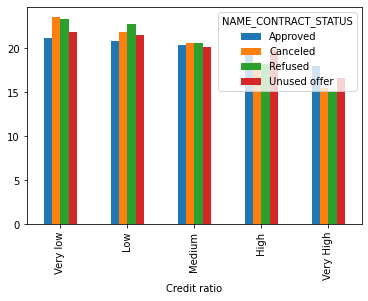

In [ ]:
combined_data_plots('Credit ratio', 'NAME_CONTRACT_STATUS')

**People who are havinf less credit ratio for then the rate of rejection is greater then rate of approval**

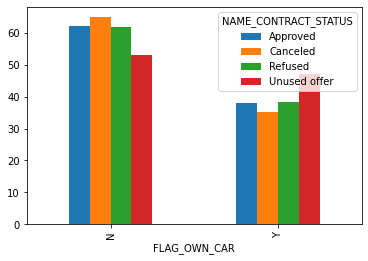

In [ ]:
combined_data_plots('FLAG_OWN_CAR', 'NAME_CONTRACT_STATUS')

# 3. Conclusion